# K-Nearest Neighbor

In [ ]:
# This algorithm is used for detecting the classes in iris dataset.

In [6]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from mpl_toolkits.mplot3d import Axes3D

import warnings

warnings.filterwarnings('ignore')

In [5]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# Assigning names to columns
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset
dataset = pd.read_csv(url, names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Train Test Split

In [8]:
X = dataset.iloc[:, :-1].values
# Target variable
y = dataset.iloc[:, 4].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

 # Preprocessing and Standardization

In [15]:
from sklearn.preprocessing import StandardScaler
    
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Detection of optimal value of K

In [25]:
from sklearn.neighbors import KNeighborsClassifier
error = []

# Calculating error between values 1-99
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

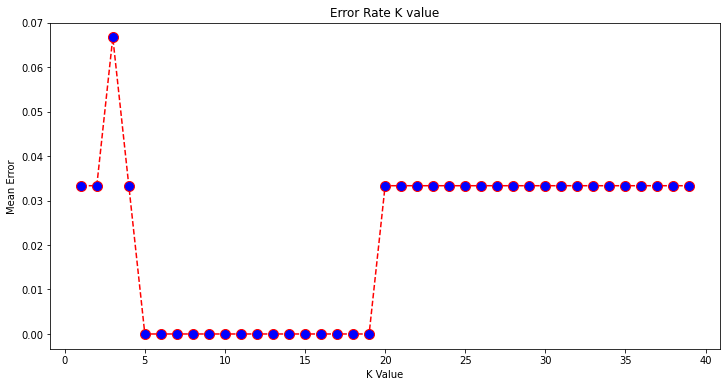

In [27]:
plt.figure(figsize=(12,6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

# K-Nearest Neighbor Classifier

In [39]:
# In the above graph, we can see that 5-20 are the optimal values - testing with these values from 5-20
classifier = KNeighborsClassifier(n_neighbors=20)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

# Predictions and classifications

In [40]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.86      1.00      0.92         6
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

